In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Maria
[nltk_data]     Gichomo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# import the required libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [5]:
tweet_df = pd.read_csv('tweets.csv')

In [6]:
tweet_df

,Tweet,Intention
0,Ligi ya Championship: Msimamo wa jedwali.\n#Ka...,1
1,Inconvenience for the One Who Guaranteed Eve M...,1
2,Ligi ya DStv Premiership: Matokeo ya mechi.\n#...,1
3,Here Are the Names of the Previous US Presiden...,0
4,@TiborPNagyJr Uhuru Kenyatta is probably not p...,0
...,...,...
4568,"P R O M O !\n\nInitial Prices: 3,500 - 4000\nP...",1
4569,10T Toilet Paper Making Line Turnkey Project\n...,1
4570,Protonitazene CAS119276-01-6 powder\nGOOD EFFE...,1
4571,New deal alert 🚨 \nRegistered Toyota Camry \nB...,1


In [7]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4573 entries, 0 to 4572
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet      4573 non-null   object
 1   Intention  4573 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 71.6+ KB


In [8]:
# printing random tweets 
print(tweet_df['Tweet'].iloc[0],"\n")
print(tweet_df['Tweet'].iloc[1],"\n")
print(tweet_df['Tweet'].iloc[2],"\n")
print(tweet_df['Tweet'].iloc[3],"\n")
print(tweet_df['Tweet'].iloc[4],"\n")

Ligi ya Championship: Msimamo wa jedwali.
#KapuLaMichezo #KiswahiliNiChetu #MkallaSports #RugerInMeru #Mpesa #SkyBetChampionship #EFL @SkyBetChamp
 Dj Grauchi President Uhuru Kenyatta Femi One Mayele https://t.co/yZB2NilXvJ 

Inconvenience for the One Who Guaranteed Eve Mungai Unloaded Him After She Became Fruitful as It Arises That He is a Phony Gsu Official - He Has Been Confined at Kilimani Police
Femi One Ndindi Nyoro president uhuru kenyatta baba the 6th Rest In Peace https://t.co/Luc4RKDFd4 

Ligi ya DStv Premiership: Matokeo ya mechi.
#KapuLaMichezo #KiswahiliNiChetu #MkallaSports #RugerInMeru #DstvPrem @OfficialPSL @TSGALAXYFC @Moroka_Swallows
@orlandopirates @RichardsBayFC_
Dj Grauchi President Uhuru Kenyatta Crimes https://t.co/0Y3pd4nain via @alphasaraplagat 

Here Are the Names of the Previous US President and a Very Rich Person Who Manipulated Raila Odinga in the Last Political Decision - It Was Not Chebukati or Ruto
#RugerInMeru Ndindi Nyoro president uhuru kenyatta Femi 

In [9]:
#creating a function to process the data
def data_processing(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"https\S+|www\S+http\S+", '', tweet, flags = re.MULTILINE)
    tweet = re.sub(r'\@w+|\#','', tweet)
    tweet = re.sub(r'[^\w\s]','',tweet)
    tweet = re.sub(r'ð','',tweet)
    tweet_tokens = word_tokenize(tweet)
    filtered_tweets = [w for w in tweet_tokens if not w in stop_words]
    return " ".join(filtered_tweets)

In [10]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Maria
[nltk_data]     Gichomo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [11]:
tweet_df.Tweet = tweet_df['Tweet'].apply(data_processing)

In [12]:
tweet_df = tweet_df.drop_duplicates('Tweet')

In [13]:
lemmatizer = WordNetLemmatizer()
def lemmatizing(data):
    tweet = [lemmatizer.lemmatize(word) for word in data]
    return data

In [14]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Maria
[nltk_data]     Gichomo\AppData\Roaming\nltk_data...


True

In [15]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to C:\Users\Maria
[nltk_data]     Gichomo\AppData\Roaming\nltk_data...


True

In [16]:
tweet_df['Tweet'] = tweet_df['Tweet'].apply(lambda x: lemmatizing(x))

C:\Users\Maria Gichomo\AppData\Local\Temp\ipykernel_11460\2906138281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df['Tweet'] = tweet_df['Tweet'].apply(lambda x: lemmatizing(x))


In [17]:
# printing the data to see the effect of preprocessing
print(tweet_df['Tweet'].iloc[0],"\n")
print(tweet_df['Tweet'].iloc[1],"\n")
print(tweet_df['Tweet'].iloc[2],"\n")
print(tweet_df['Tweet'].iloc[3],"\n")
print(tweet_df['Tweet'].iloc[4],"\n")

ligi ya championship msimamo wa jedwali kapulamichezo kiswahilinichetu mkallasports rugerinmeru mpesa skybetchampionship efl skybetchamp dj grauchi president uhuru kenyatta femi one mayele 

inconvenience one guaranteed eve mungai unloaded became fruitful arises phony gsu official confined kilimani police femi one ndindi nyoro president uhuru kenyatta baba 6th rest peace 

ligi ya dstv premiership matokeo ya mechi kapulamichezo kiswahilinichetu mkallasports rugerinmeru dstvprem officialpsl tsgalaxyfc moroka_swallows orlandopirates richardsbayfc_ dj grauchi president uhuru kenyatta crimes via alphasaraplagat 

names previous us president rich person manipulated raila odinga last political decision chebukati ruto rugerinmeru ndindi nyoro president uhuru kenyatta femi one 

tiborpnagyjr uhuru kenyatta probably paid yet tiborpnagyjr company abiyahmedali esayasafeworki 



In [18]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3990 entries, 0 to 4572
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet      3990 non-null   object
 1   Intention  3990 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 93.5+ KB


In [19]:
tweet_df['Intention'].value_counts()

0    2024
1    1966
Name: Intention, dtype: int64

<AxesSubplot:xlabel='Intention', ylabel='count'>

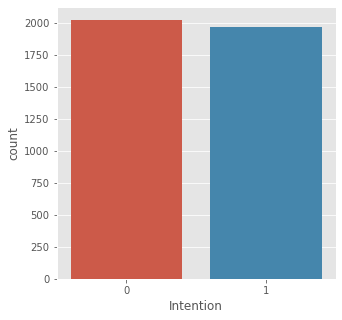

In [20]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='Intention', data = tweet_df)

Text(0.5, 1.0, 'Distribution of Ads')

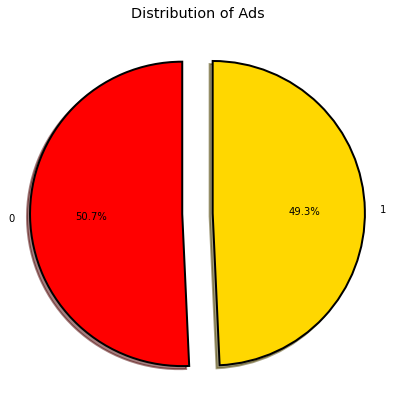

In [21]:
fig = plt.figure(figsize=(7,7))
colors = ("red", "gold")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = tweet_df['Intention'].value_counts()
explode = (0.1, 0.1)
tags.plot(kind='pie',autopct = '%1.1f%%', shadow=True, colors = colors, startangle =90, 
         wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of Ads')

In [22]:
Non_ads = tweet_df[tweet_df.Intention == 0]
Non_ads.head()

,Tweet,Intention
3,names previous us president rich person manipu...,0
4,tiborpnagyjr uhuru kenyatta probably paid yet ...,0
5,kenyas former president uhuru kenyatta key pla...,0
6,caxstonepkigata think hon mungatana wash wash ...,0
8,au talks expected mediated troika negotiators ...,0


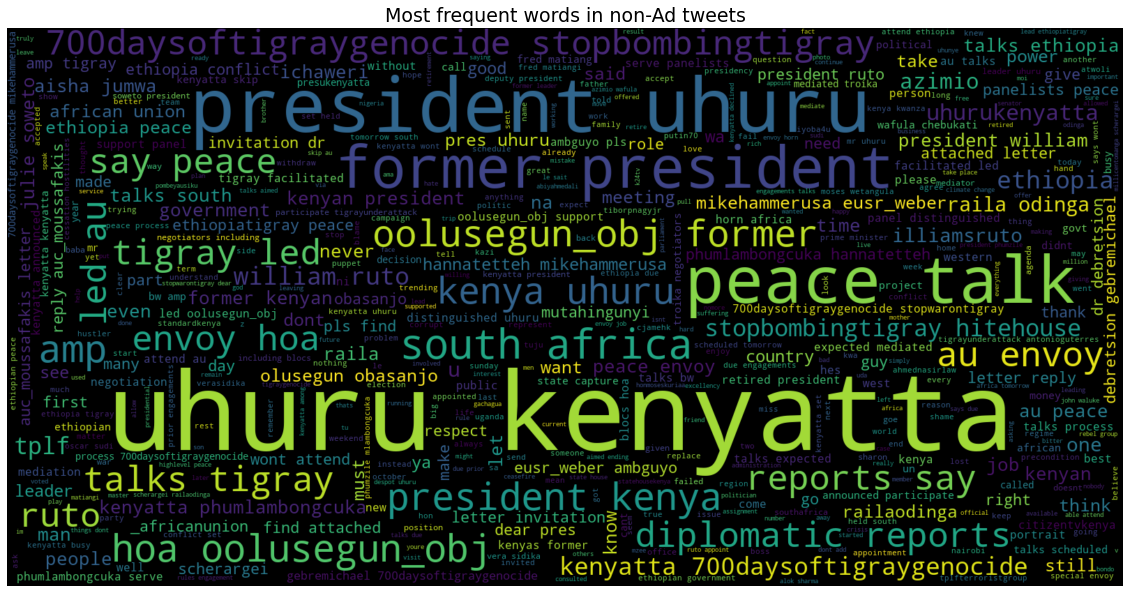

In [23]:
text = ' '.join([word for word in Non_ads['Tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in non-Ad tweets', fontsize = 19)
plt.show()

In [24]:
Ads = tweet_df[tweet_df.Intention == 1]
Ads.head()

,Tweet,Intention
0,ligi ya championship msimamo wa jedwali kapula...,1
1,inconvenience one guaranteed eve mungai unload...,1
2,ligi ya dstv premiership matokeo ya mechi kapu...,1
7,wife children left extahidi high entertainer o...,1
9,unlock mkopa phones use samsung nokia without ...,1


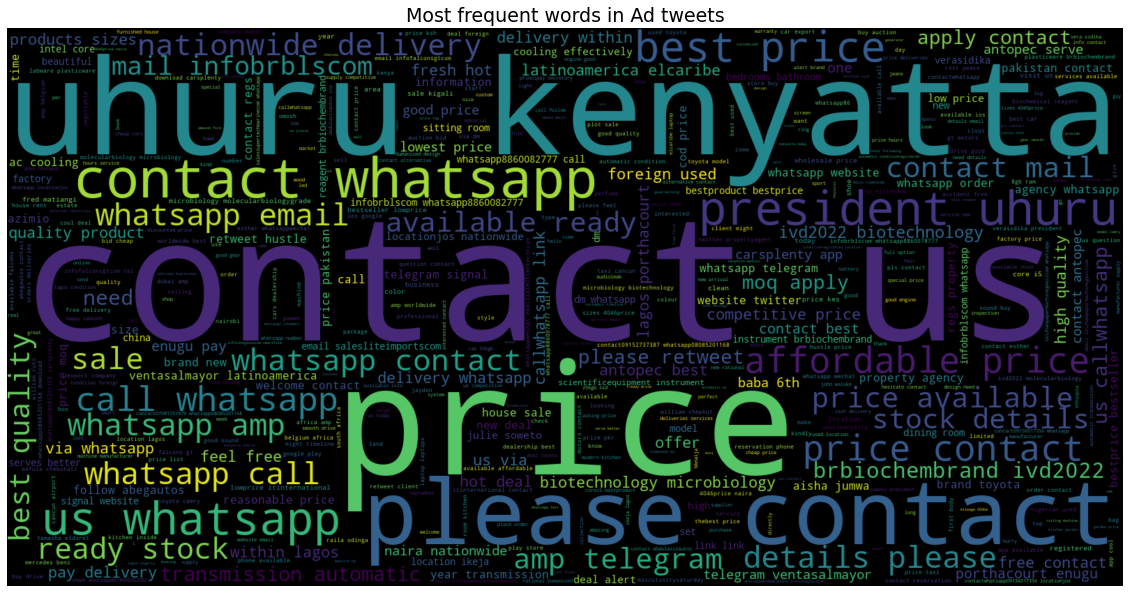

In [25]:
text = ' '.join([word for word in Ads['Tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in Ad tweets', fontsize = 19)
plt.show()

In [26]:
vect = TfidfVectorizer(ngram_range=(1,2)).fit(tweet_df['Tweet'])

In [27]:
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features: \n{}".format(feature_names[:20]))

Number of features: 60227

First 20 features: 
['00', '00 98', '00 mtr', '000', '000 2010', '000 2011', '000 2022', '000 info', '000 petrol', '000 recent', '000 recently', '000 visit', '00000', '00000 neg', '000007', '000007 pi', '000019', '000019 pi', '000035', '000035 pi']


C:\Users\Maria Gichomo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [28]:
vect = TfidfVectorizer(ngram_range=(1,3)).fit(tweet_df['Tweet'])

In [29]:
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features: \n{}".format(feature_names[:20]))

Number of features: 110130

First 20 features: 
['00', '00 98', '00 98 visit', '00 mtr', '00 mtr dupatta', '000', '000 2010', '000 2010 model', '000 2011', '000 2011 model', '000 2022', '000 2022 model', '000 info', '000 info please', '000 petrol', '000 petrol engine', '000 recent', '000 recent import', '000 recently', '000 recently registered']


# Model Building

In [30]:
X = tweet_df['Tweet']
Y = tweet_df['Intention']
X = vect.transform(X)

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [32]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train: (3192, 110130)
Size of y_train: (3192,)
Size of x_test:  (798, 110130)
Size of y_test:  (798,)


In [33]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_predict = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_predict, y_test)
print("Test accuarcy: {:.2f}%".format(logreg_acc*100))

Test accuarcy: 97.24%


In [34]:
print(confusion_matrix(y_test, logreg_predict))
print("\n")
print(classification_report(y_test, logreg_predict))

[[421   0]
 [ 22 355]]


              precision    recall  f1-score   support

           0       0.95      1.00      0.97       421
           1       1.00      0.94      0.97       377

    accuracy                           0.97       798
   macro avg       0.98      0.97      0.97       798
weighted avg       0.97      0.97      0.97       798



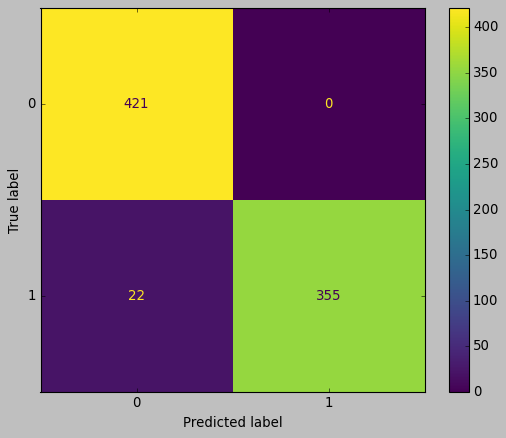

In [35]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_predict, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()

In [36]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [37]:
param_grid = {'C':[100, 10, 1.0, 0.1, 0.01], 'solver' :['newton-cg', 'lbfgs','liblinear']}
grid = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
grid.fit(x_train, y_train)
print("Best Cross validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best Cross validation score: 0.97
Best parameters:  {'C': 100, 'solver': 'newton-cg'}


In [38]:
y_pred = grid.predict(x_test)

In [39]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 98.25%


In [41]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[420   1]
 [ 13 364]]


              precision    recall  f1-score   support

           0       0.97      1.00      0.98       421
           1       1.00      0.97      0.98       377

    accuracy                           0.98       798
   macro avg       0.98      0.98      0.98       798
weighted avg       0.98      0.98      0.98       798

